<h1>Online Shoppers Intention Analysis</h1>

透過使用者瀏覽購物網站的行為模式，來分析如何提高使用者購買意願。

In [1]:
import numpy as np # linear algebra
#np.set_printoptions(threshold=np.inf)
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Visualization
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics

In [2]:
ori_data = pd.read_csv('./online_shoppers_intention.csv')
ori_data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [3]:
ori_data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

<h2>關聯性</h2>
<p>此處使用在 Hw1 中學到的關聯性分析</p>
<p>探討各性質之間的相關性，並以 Heatmap 呈現</p>

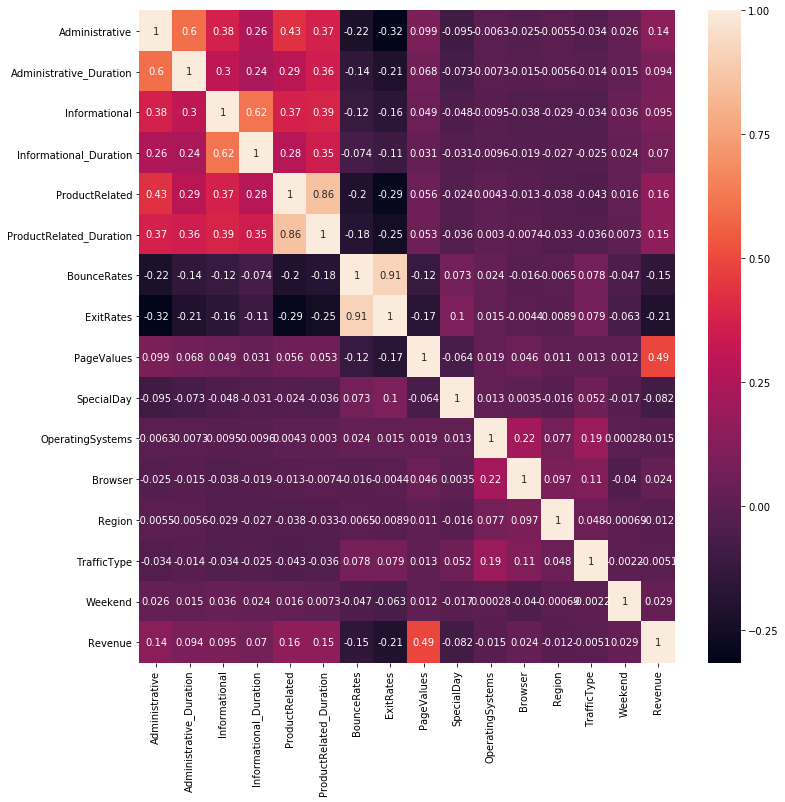

In [4]:
corr=ori_data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']].corr()
#corr
#type(corr)
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot = True)

發現 Month 與 visitortype 因為不為數字型態，所以無法算 corrilation
所以接下來將 Month 與 visitortype 轉為數字形式，再做一次關聯性觀察

In [5]:
month_map={'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5,'June':6, 'Jul':7,'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
#ori_data['Month']=ori_data['Month'].map(month_map)
#ori_data
tran_data = ori_data
tran_data['Month']=ori_data['Month'].map(month_map)
tran_data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,Returning_Visitor,False,False


這邊在 mapping 的過程中，發現若此 cell 執行超過一次，則會因為 month 欄位的值在第一次已經被 mapping 成數字，而發生全部變為 NaN 的情況。一開始因不熟悉 mapping 而困惑了許久。

In [6]:
visitortype_map={'Returning_Visitor':1, 'New_Visitor':0}
tran_data['VisitorType']=ori_data['VisitorType'].map(visitortype_map)
tran_data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,1.0,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,1.0,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,1.0,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,1.0,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,1.0,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,1.0,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,1.0,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,1.0,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,1.0,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,1.0,False,False


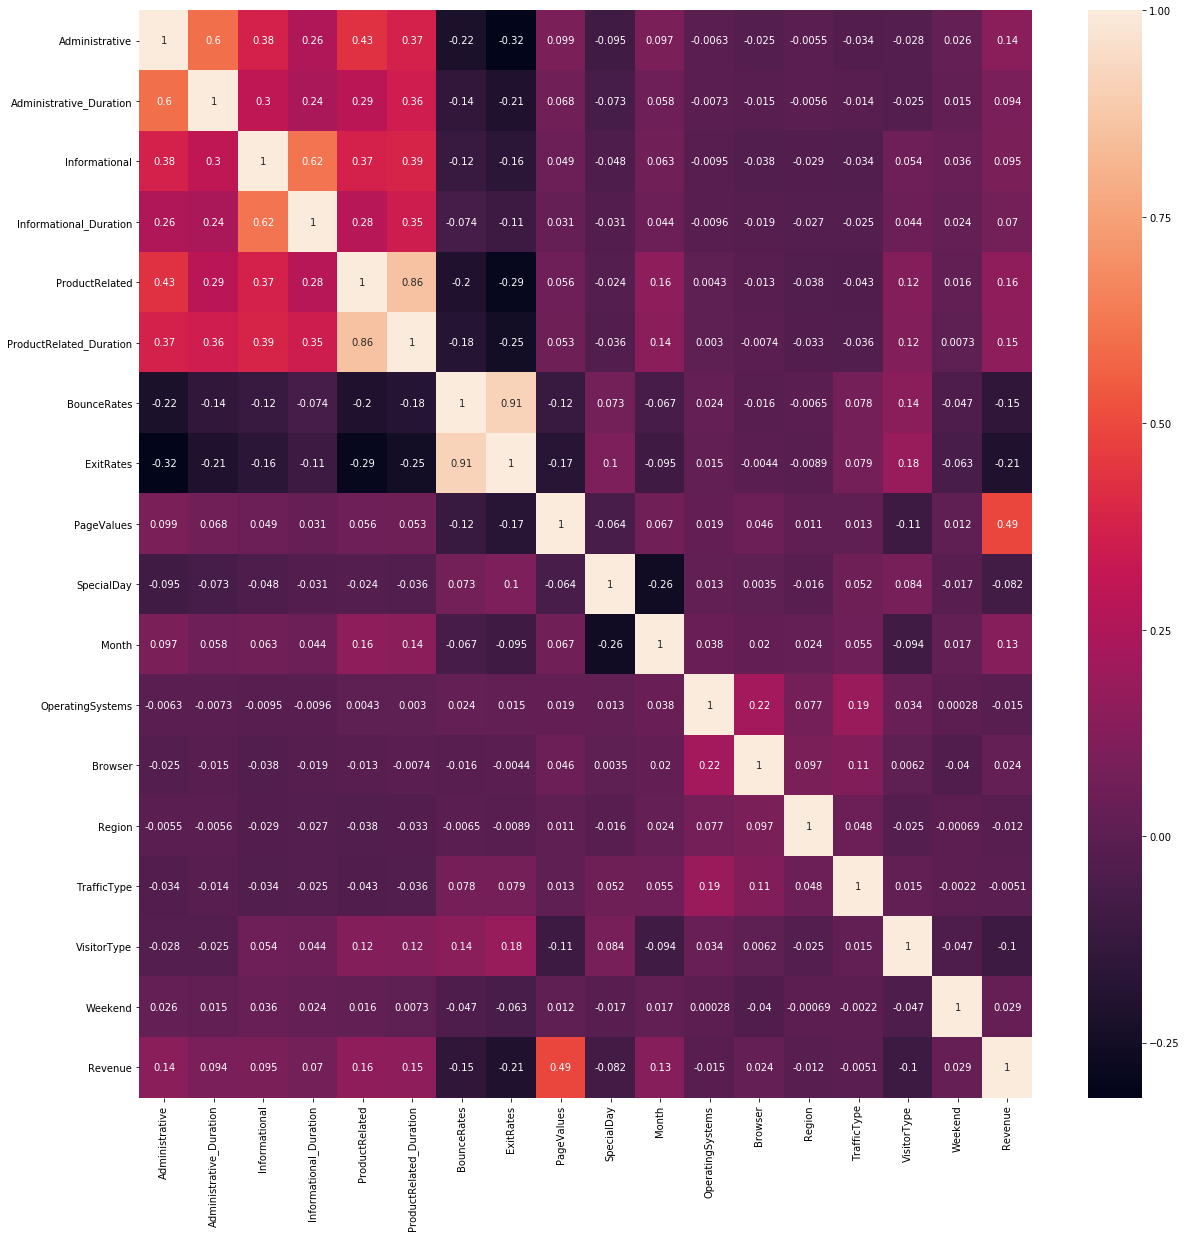

In [7]:
corrt=tran_data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']].corr()
#corr
#type(corr)
plt.figure(figsize=(20,20))
sns.heatmap(corrt, annot = True)

In [8]:
tran_data['VisitorType'].value_counts()

1.0    10551
0.0     1694
Name: VisitorType, dtype: int64

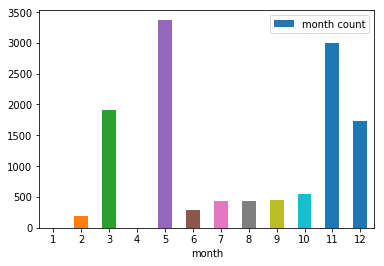

In [9]:
data_month = []
for m in tran_data['Month']:
    data_month.append(m)
month = []
for i in range(1,13):
    month.append(i)
month_count = np.zeros(12)
for i in month:
    for j in data_month:
        if i == j :
            month_count[i-1] +=1
df = pd.DataFrame({'month':month, 'month count':month_count})
ax1 = df.plot.bar(x='month', y='month count', rot=1)

In [10]:
buy_data = tran_data[tran_data['Revenue'] == 1]
buy_data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
65,3,87.833333,0,0.0,27,798.333333,0.000000,0.012644,22.916036,0.8,2,2,2,3,1,1.0,False,True
76,10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,2,2,6,1,2,1.0,False,True
101,4,61.000000,0,0.0,19,607.000000,0.000000,0.026984,17.535959,1.0,2,1,1,7,4,1.0,True,True
188,9,111.500000,1,48.5,49,1868.819697,0.000000,0.020709,1.706015,0.0,3,2,2,7,2,1.0,False,True
196,2,56.000000,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,3,2,2,4,2,0.0,False,True
198,0,0.000000,0,0.0,17,840.233333,0.000000,0.001667,109.176000,0.0,3,2,2,9,2,0.0,False,True
199,3,94.000000,2,125.0,55,1970.844805,0.000000,0.001724,96.255116,0.0,3,2,4,1,2,0.0,True,True
200,1,32.000000,0,0.0,50,2867.000000,0.000000,0.004000,153.443248,0.0,3,2,2,7,8,1.0,True,True
206,1,18.000000,0,0.0,16,1331.750000,0.000000,0.012500,33.799567,0.0,3,2,5,2,3,0.0,False,True
220,2,38.000000,0,0.0,14,643.000000,0.000000,0.013333,35.092800,0.0,3,2,2,5,1,1.0,False,True


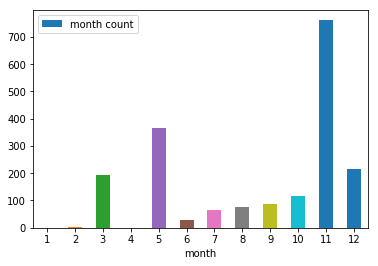

In [11]:
data_month_buy = []
for m in buy_data['Month']:
    data_month_buy.append(m)
month = []
for i in range(1,13):
    month.append(i)
month_buy_count = np.zeros(12)
for i in month:
    for j in data_month_buy:
        if i == j :
            month_buy_count[i-1] +=1
df = pd.DataFrame({'month':month, 'month count':month_buy_count})
ax1 = df.plot.bar(x='month', y='month count', rot=1)

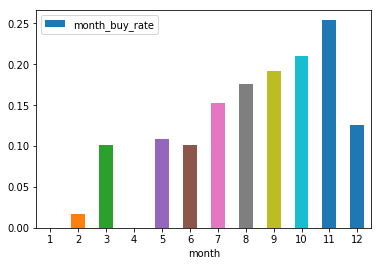

In [12]:
month_buy_rate = np.zeros(12)
for i in range(12):
    if month_count[i] != 0:
        month_buy_rate[i] = month_buy_count[i]/month_count[i]
df = pd.DataFrame({'month':month, 'month_buy_rate':month_buy_rate})
ax3 = df.plot.bar(x='month', y='month_buy_rate', rot=1)      

<h2>以各種模型預測消費者的購買行為</h2>

<p>經過上面的分析後，對於這個 feature 眾多的 dataset 有更進一步的認識</p>

<p>接下來將把 dataset 打亂之後，對模型進行 training 並試著預測消費者的購買行為</p>

In [13]:
pd_data = pd.read_csv('./online_shoppers_intention.csv')
pd_data = pd_data.sample(frac=1).reset_index(drop=True)

pd_data['Month']=pd_data['Month'].map(month_map)
pd_data['VisitorType']=pd_data['VisitorType'].map(visitortype_map)

pd_train = pd_data.head(11000)
pd_test = pd_data.tail(1330)
pd_train.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,7,44.295455,0,0.0,44,2747.616288,0.024205,0.062409,0.000000,0.0,11,2,2,7,1,1.0,False,False
1,0,0.000000,0,0.0,29,1137.166667,0.000000,0.007143,22.274571,0.0,5,1,8,1,11,1.0,True,True
2,3,30.500000,0,0.0,79,2431.242995,0.000000,0.005590,0.000000,0.0,11,2,2,2,6,1.0,False,False
3,1,116.000000,0,0.0,22,1245.600000,0.008696,0.030435,27.819130,0.0,5,1,1,3,4,1.0,True,True
4,3,296.000000,0,0.0,9,394.500000,0.000000,0.005556,28.398333,0.0,5,2,2,8,2,0.0,True,True


In [14]:
print("training data:")
print(pd_train['Revenue'].value_counts()/len(pd_train))
print("testing data:")
print(pd_test['Revenue'].value_counts()/len(pd_test))

training data:
False    0.846091
True     0.153909
Name: Revenue, dtype: float64
testing data:
False    0.838346
True     0.161654
Name: Revenue, dtype: float64


<h2>Regression</h2>

這邊開始引入第一個模型：Regression(迴歸)

這裡採用的是 LogisticRegression，並且在一開始先不 Drop 任何欄位，

In [32]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


train_x = pd_train[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','Weekend']]

train_y = pd_train['Revenue']

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)

#print(log_reg.coef_)

test_x = pd_test[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','Weekend']]
test_y = pd_test['Revenue']

log_predict = log_reg.predict(test_x)
print(log_predict)
#print(len(log_predict))

[False False False ... False False False]


In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(test_y, log_predict))

Accuracy: 0.8849624060150376


In [29]:
train1_x = train_x[['PageValues']]
test1_x = test_x[['PageValues']]
log_reg1 = LogisticRegression()
log_reg1.fit(train1_x, train_y)
log_predict1 = log_reg1.predict(test1_x)

print("Accuracy:",accuracy_score(test_y, log_predict1))

Accuracy: 0.8879699248120301


<h2>Support Vector Machine</h2>

這邊引入第二個模型：SVM

對 Data 進行 Scaler 並建立模型，預測使用者購買與否。

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm

train_x_std = train_x

scaler = StandardScaler()
scaler.fit(train_x_std)

test_x_std = test_x

train_x_std = scaler.transform(train_x_std)
test_x_std = scaler.transform(test_x_std)

/home/acnes2/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/acnes2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/home/acnes2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [31]:
svm_model = svm.SVC()
svm_model = svm_model.fit(train_x_std, train_y)
svm_predict_train = svm_model.predict(train_x_std)
svm_predict_test = svm_model.predict(test_x_std)

print("Accuracy of training data:",accuracy_score(train_y, svm_predict_train))
print("Accuracy of testing data:",accuracy_score(test_y, svm_predict_test))


Accuracy of training data: 0.9038181818181819
Accuracy of testing data: 0.8857142857142857


In [33]:
svm_model2 = svm.SVC(C=3, probability = True, max_iter=-1, degree=5)
svm_model2 = svm_model2.fit(train_x_std, train_y)
svm_predict_train2 = svm_model2.predict(train_x_std)
svm_predict_test2 = svm_model2.predict(test_x_std)

print("Accuracy of training data:",accuracy_score(train_y, svm_predict_train2))
print("Accuracy of testing data:",accuracy_score(test_y, svm_predict_test2))

Accuracy of training data: 0.9168181818181819
Accuracy of testing data: 0.8894736842105263


In [34]:
svm_model3 = svm.SVC(C = 1.5)
svm_model3 = svm_model3.fit(train_x_std, train_y)
svm_predict_train3 = svm_model3.predict(train_x_std)
svm_predict_test3 = svm_model3.predict(test_x_std)

print("Accuracy of training data:",accuracy_score(train_y, svm_predict_train3))
print("Accuracy of testing data:",accuracy_score(test_y, svm_predict_test3))

Accuracy of training data: 0.9082727272727272
Accuracy of testing data: 0.8872180451127819


In [35]:
train_x_less = train1_x
test_x_less = test1_x

scalerr = StandardScaler()
scalerr.fit(train_x_less)

train_x_less = scalerr.transform(train_x_less)
test_x_less = scalerr.transform(test_x_less)

svm_model_less = svm.SVC()
svm_model_less = svm_model_less.fit(train_x_less, train_y)
svm_predict_train_less = svm_model_less.predict(train_x_less)
svm_predict_test_less = svm_model_less.predict(test_x_less)

print("Accuracy of training data:",accuracy_score(train_y, svm_predict_train_less))
print("Accuracy of testing data:",accuracy_score(test_y, svm_predict_test_less))

Accuracy of training data: 0.8924545454545455
Accuracy of testing data: 0.8857142857142857


<h2>Neural Network</h2>

<p>最後是我最寄與厚望的 Neural Network</p>

<p>在先前的作業中這個模型準確率難以超過其他模型，不知道這次表現會如何呢</p>

一開始測試一層 Hidden Layer 的網路，其中含有 100 個 units。(依然保留所有 feature)

In [38]:
from keras import models, layers, optimizers, regularizers,utils

model = models.Sequential()
model.add(layers.Dense(input_dim = 16,units = 100,activation='sigmoid'))
model.add(layers.Dense(units = 1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.summary()
history = model.fit(train_x_std, train_y, epochs=100, verbose=False)
neural_predict = model.predict_classes(test_x_std)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1700      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
0.8917293233082707


In [39]:
print("accuracy:",accuracy_score(test_y, neural_predict))

accuracy: 0.8917293233082707


In [40]:
model = models.Sequential()
model.add(layers.Dense(input_dim = 16,units = 20,activation='sigmoid'))
model.add(layers.Dense(units = 50,activation='sigmoid'))
model.add(layers.Dense(units = 1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.summary()
history = model.fit(train_x_std, train_y, epochs=100, verbose=False)
neural_predict = model.predict_classes(test_x_std)
print("accuracy:",accuracy_score(test_y, neural_predict))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                340       
_________________________________________________________________
dense_6 (Dense)              (None, 50)                1050      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.8887218045112782


In [41]:
model = models.Sequential()
model.add(layers.Dense(input_dim = 16,units = 20,activation='relu'))
model.add(layers.Dense(units = 50,activation='relu'))
model.add(layers.Dense(units = 1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.summary()
history = model.fit(train_x_std, train_y, epochs=100, verbose=False)
neural_predict = model.predict_classes(test_x_std)
print(accuracy_score(test_y, neural_predict))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                340       
_________________________________________________________________
dense_9 (Dense)              (None, 50)                1050      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________
0.8781954887218045


In [47]:
model = models.Sequential()
model.add(layers.Dense(input_dim = 16,units = 50,activation='sigmoid'))
model.add(layers.Dense(units = 80,activation='sigmoid'))
model.add(layers.Dense(units = 80,activation='sigmoid'))
model.add(layers.Dense(units = 1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.summary()
history = model.fit(train_x_std, train_y, epochs=100, verbose=False)
neural_predict = model.predict_classes(test_x_std)
print("accuracy:",accuracy_score(test_y, neural_predict))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 50)                850       
_________________________________________________________________
dense_27 (Dense)             (None, 80)                4080      
_________________________________________________________________
dense_28 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 81        
Total params: 11,491
Trainable params: 11,491
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.8924812030075188


<h2>總結</h2>

<p>在對 dataset 經過簡單的觀察與分析後，利用在 Hw3 中學到的三種預測模型進行預測，並比較準確率。</p>
<p>三種模型分別為 Logistic regression,SVM 以及 Neural network</p>

<h3>準確率比較：</h3>

Neural network:0.892 > SVM:0.891 >Logistic regression:0.88

<h3>應用層面：</h3>

由一開始 VisitorType 的統計可以發現，購物網站的新血比例較少，這可能代表大部分的使用者一試成主顧，

但更有可能是缺乏廣告等等曝光機會，無法吸引新的使用者加入。

而 11 月暴增的使用者、成交數、成交比例，可能代表當期的活動辦的不錯，或是剛好遇到 1111 光棍節等因素，

使得使用者的購買意願大幅增加。若可以複製這樣的模式，可望刺激使用者的買氣。

而與 Revenue 關聯性最高的 PageValues 顯示在購物網站上花的時間愈長、瀏覽的網頁愈多，購買的機率就愈高。

增加一些互動式的活動，以折價卷等獎勵誘使使用者留在購物網站上，應能讓使用者的購買意願提高。

但當上述這些因素混在一起時，使用者的行為模式不一定會如我們所預期，

故一邊做出行動並且一邊分析使用者的反應是必須的！